In [1]:
%reset -sf

import pandas as pd
import numpy as np
import scipy as sp
import gc
import os
from matplotlib import pyplot as plt
import mplhep as hep

import get_data as gd
import atlas_plot as ap
plot = ap.Plotter()

In [2]:
sig_pred = np.load("test_W_on.npz")["pred_y"]
sig_truth = np.load("test_W_on.npz")["test_y"]
data =np.array([sig_pred, sig_truth])

In [3]:
label = "W"
title = "W boson"
range=[0.1, 1]

In [4]:
np.histogram(data[0], bins=50, range=range)

(array([6324, 4475, 3335, 2560, 2002, 1622, 1304, 1116,  837,  671,  546,
         451,  397,  334,  256,  241,  174,  138,  120,   86,   79,   39,
          36,   27,   31,   18,   25,   16,   18,   20,   12,   17,   17,
          15,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0]),
 array([0.1  , 0.118, 0.136, 0.154, 0.172, 0.19 , 0.208, 0.226, 0.244,
        0.262, 0.28 , 0.298, 0.316, 0.334, 0.352, 0.37 , 0.388, 0.406,
        0.424, 0.442, 0.46 , 0.478, 0.496, 0.514, 0.532, 0.55 , 0.568,
        0.586, 0.604, 0.622, 0.64 , 0.658, 0.676, 0.694, 0.712, 0.73 ,
        0.748, 0.766, 0.784, 0.802, 0.82 , 0.838, 0.856, 0.874, 0.892,
        0.91 , 0.928, 0.946, 0.964, 0.982, 1.   ]))

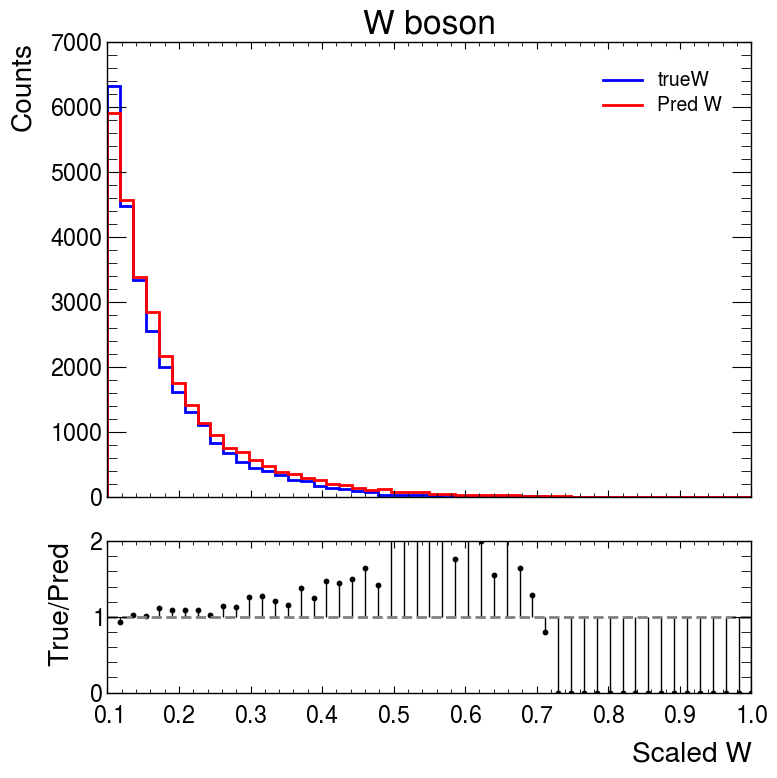

In [7]:
plt.style.use(hep.style.ATLAS)

fig, ax = plt.subplots(
    nrows=2,
    ncols=1,
    figsize=(8, 8),
    gridspec_kw={"height_ratios": [6, 2]},
    sharex=True,
    tight_layout=True,
)
ax = ax.flatten()
truth_bar, truth_bin = np.histogram(data[0], bins=50, range=range)
pred_bar, pred_bin = np.histogram(data[1], bins=50, range=range)
hep.histplot(truth_bar, truth_bin, label="true"+label, ax=ax[0], lw=2, color="b")
hep.histplot(
    pred_bar,
    truth_bin,
    label="Pred "+label,
    ax=ax[0],
    lw=2,
    color="r",
)
ax[0].set_xlim(range)
ax[0].legend()
ax[0].set_ylabel("Counts")
ax[0].set_title(title)
ratio = np.divide(pred_bar, truth_bar, where=(truth_bar != 0))
ax[1].vlines(truth_bin[1::], 1, ratio, color="k", lw=1)
ax[1].scatter(truth_bin[1::], ratio, color="k", lw=1, s=10, label="")
# ax[1].set_yscale('log')
ax[1].set_ylim([0, 2])
ax[1].axhline(1, c="grey", ls="dashed")
ax[1].set_xlabel("Scaled " + label)
ax[1].set_ylabel("True/Pred")
ax[1].tick_params(axis="x", pad=9)
plt.show()

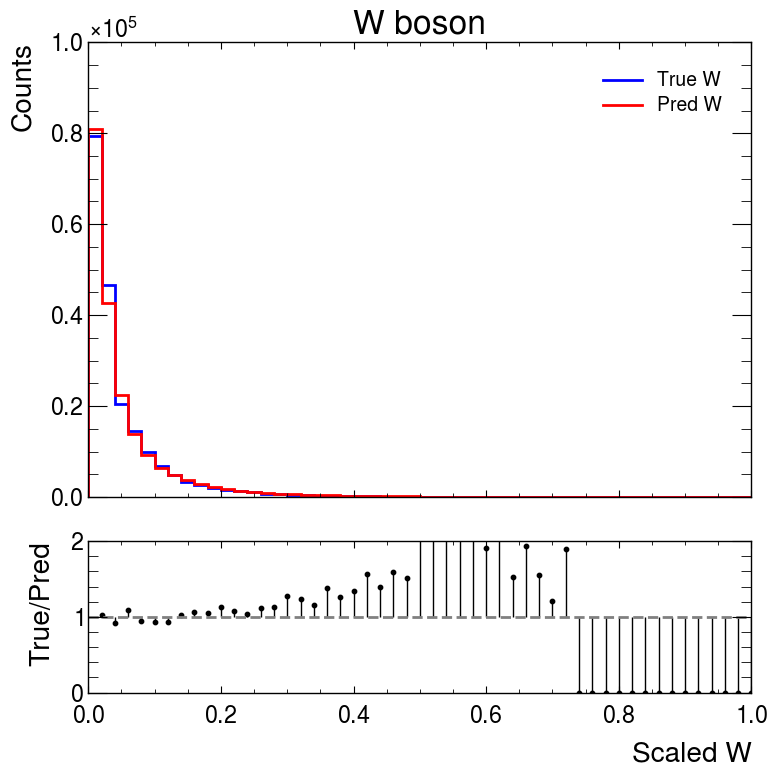

In [6]:
plot.hist(data, range=[0,1], title=title, label=label)